In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

data = pd.read_csv("D:\inter-task\9. Sales-Data-Analysis.csv")


<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Dell\AppData\Local\Temp\ipykernel_15128\3732446515.py:5: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_csv("D:\inter-task\9. Sales-Data-Analysis.csv")


In [2]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [3]:
data.isnull()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
249,False,False,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False
252,False,False,False,False,False,False,False,False,False


In [4]:
data['Revenue'] = data['Price'] * data['Quantity']
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London,2000.0143
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid,2199.9920
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon,999.9960
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin,7400.0133
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin,2000.0495


In [5]:
payment_methods = data['Payment Method'].value_counts()
print(" Qno .1 \n Most Preferred Payment Method:")
print(payment_methods)
print(f"Most Preferred: {payment_methods.index[0]} ({payment_methods.iloc[0]} transactions)")

 Qno .1 
 Most Preferred Payment Method:
Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64
Most Preferred:  Credit Card (120 transactions)


In [6]:
product_quantity = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print("Q.2\n Most Selling Products by Quantity (Top 3):")
print(product_quantity.head(3))


product_revenue = data.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
print(" Most Selling Products by Revenue (Top 3):")
print(product_revenue.head(3))

Q.2
 Most Selling Products by Quantity (Top 3):
Product
Beverages    34983.14
Fries        32034.34
Burgers      29022.31
Name: Quantity, dtype: float64
 Most Selling Products by Revenue (Top 3):
Product
Burgers               376999.8069
Fries                 125674.2903
Chicken Sandwiches    114641.6950
Name: Revenue, dtype: float64


In [7]:

city_revenue = data.groupby('City')['Revenue'].sum().sort_values(ascending=False)
print(" Q3\n Revenue by City:")
print(city_revenue)
print(f"City with Maximum Revenue: {city_revenue.index[0]} (${city_revenue.iloc[0]:,.2f})")

manager_revenue = data.groupby('Manager')['Revenue'].sum().sort_values(ascending=False)
print(" Revenue by Manager:")
print(manager_revenue)
print(f"Manager with Maximum Revenue: {manager_revenue.index[0]} (${manager_revenue.iloc[0]:,.2f})")

 Q3
 Revenue by City:
City
Lisbon    241714.1157
London    211201.0406
Madrid    136200.2665
Berlin    100600.1313
Paris      79800.3051
Name: Revenue, dtype: float64
City with Maximum Revenue: Lisbon ($241,714.12)
 Revenue by Manager:
Manager
Joao Silva            225074.7665
Tom Jackson           209201.0263
Pablo Perez           107600.2549
Walter Muller         100600.1313
Remy Monet             72800.2690
       Pablo Perez     23200.0330
Joao    Silva          16639.3492
       Remy Monet       4000.0258
Pablo  Perez            2199.9913
Pablo   Perez           2199.9913
Tom      Jackson        2000.0143
Remy    Monet           2000.0143
Pablo    Perez           999.9960
Remy     Monet           999.9960
Name: Revenue, dtype: float64
Manager with Maximum Revenue: Joao Silva ($225,074.77)


In [8]:
date_revenue = data.groupby('Date')['Revenue'].sum()
print(" Q4\n Date-wise Revenue:")
print(date_revenue)

 Q4
 Date-wise Revenue:
Date
01-12-2022    13400.1144
02-12-2022    14000.0535
03-12-2022    14000.0535
04-12-2022     9000.1007
05-12-2022    14200.0386
06-12-2022    14000.1225
07-11-2022     5200.0023
07-12-2022    14000.0535
08-11-2022    12400.0731
08-12-2022    14200.0995
09-11-2022    14200.0386
09-12-2022    14600.0616
10-11-2022    13200.0426
10-12-2022    14600.0616
11-11-2022    14400.0156
11-12-2022    15000.0881
12-11-2022    14000.0535
12-12-2022    14600.0616
13-11-2022    27674.4512
13-12-2022    14600.0616
14-11-2022    17839.3445
14-12-2022    14600.0106
15-11-2022    13600.0305
15-12-2022    14400.0945
16-11-2022    13600.0305
16-12-2022    15000.0371
17-11-2022    14000.0535
17-12-2022    15400.0950
18-11-2022    14400.1114
18-12-2022    15600.0111
19-11-2022    14000.0194
19-12-2022    15799.9613
20-11-2022     8200.0466
20-12-2022    16000.0073
21-11-2022    14000.0838
21-12-2022    16399.9694
22-11-2022    13599.9918
22-12-2022    16599.9644
23-11-2022    13800.0

In [9]:
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

In [10]:
avg_revenue = data['Revenue'].mean()
print(f"Q 5\n Average Revenue: ${avg_revenue:,.2f}")

Q 5
 Average Revenue: $3,029.59


In [11]:
avg_revenue_everyday = data.groupby(['Date'])['Revenue'].mean()
avg_revenue_everyday.sort_index()
nov_avg= avg_revenue_everyday.iloc[0:24].mean()
dec_avg= avg_revenue_everyday.iloc[25:].mean()
print(f'Q6\n Average value of nov: {nov_avg}')
print(f'Average value of dec: {dec_avg}')

Q6
 Average value of nov: 2952.3452118750006
Average value of dec: 3155.008978214285


In [12]:

sd_1 = data["Revenue"].std()
sd_2 = data["Quantity"].std()
print(f'Q7 \nStandard Deviation of Revenue: {sd_1}')
print(f'Standard Deviation of Quantity: {sd_2}')

Q7 
Standard Deviation of Revenue: 2420.11837804107
Standard Deviation of Quantity: 214.88869921528874


In [13]:

va_1 = data["Revenue"].var()
va_2 = data["Quantity"].var()
print(f'Q8 \nVariance of Revenue: {va_1}')
print(f'Variance of Quantity: {va_2}')

Q8 
Variance of Revenue: 5856972.963732139
Variance of Quantity: 46177.153050438836


In [14]:

import matplotlib.pyplot as plt

In [15]:
data['Date'].unique
print("Q 9")

Q 9


In [16]:
# unique_date = data['Date'].unique
date_ = pd.to_datetime(data['Date'], format= "%d-%m-%Y")
ud = date_.unique
ud 

<bound method Series.unique of 0     2022-11-07
1     2022-11-07
2     2022-11-07
3     2022-11-08
4     2022-11-08
         ...    
249   2022-12-28
250   2022-12-29
251   2022-12-29
252   2022-12-29
253   2022-12-29
Name: Date, Length: 254, dtype: datetime64[ns]>

(array([19304., 19311., 19318., 19327., 19334., 19341., 19348.]),
 [Text(19304.0, 0, '2022-11-08'),
  Text(19311.0, 0, '2022-11-15'),
  Text(19318.0, 0, '2022-11-22'),
  Text(19327.0, 0, '2022-12-01'),
  Text(19334.0, 0, '2022-12-08'),
  Text(19341.0, 0, '2022-12-15'),
  Text(19348.0, 0, '2022-12-22')])

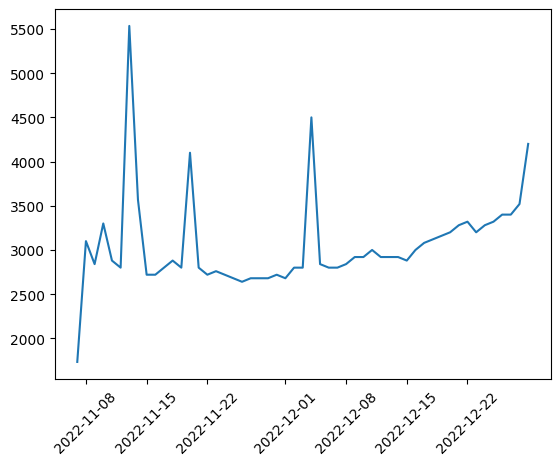

In [17]:
plt.plot(data.groupby(['Date'])['Revenue'].mean())
plt.xticks(rotation=45)

(array([19304., 19311., 19318., 19327., 19334., 19341., 19348.]),
 [Text(19304.0, 0, '2022-11-08'),
  Text(19311.0, 0, '2022-11-15'),
  Text(19318.0, 0, '2022-11-22'),
  Text(19327.0, 0, '2022-12-01'),
  Text(19334.0, 0, '2022-12-08'),
  Text(19341.0, 0, '2022-12-15'),
  Text(19348.0, 0, '2022-12-22')])

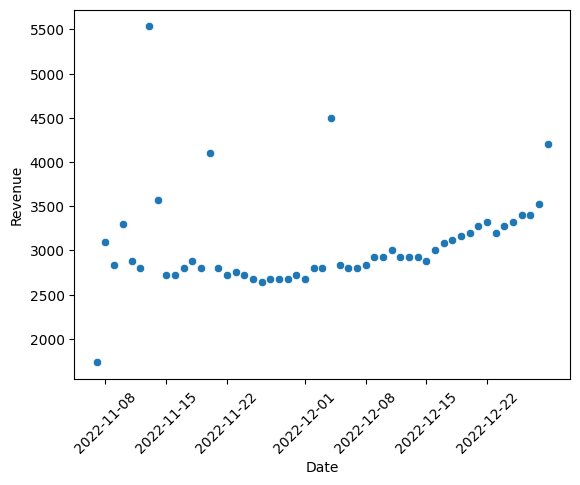

In [18]:
import seaborn as sns
sns.scatterplot(data.groupby(['Date'])['Revenue'].mean())
plt.xticks(rotation = 45)

In [19]:
def red_float(x):
    return f"{x:.2f}"

pro_avg_q = data.groupby(["Product"])["Quantity"].mean()
pro_avg_r = data.groupby(["Product"])["Revenue"].mean().apply(red_float)
print("Q 10")
print(f"Average 'Quantity Sold' for each product \n {pro_avg_q.round()} \n")

print(f"Average Revenue for each product\n{pro_avg_r}" )




Q 10
Average 'Quantity Sold' for each product 
 Product
Beverages             700.0
Burgers               558.0
Chicken Sandwiches    214.0
Fries                 628.0
Sides & Other         200.0
Name: Quantity, dtype: float64 

Average Revenue for each product
Product
Beverages             2064.01
Burgers               7250.00
Chicken Sandwiches    2204.65
Fries                 2464.20
Sides & Other         1000.00
Name: Revenue, dtype: object
